In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('train.csv')

In [44]:
train.shape

(42000, 785)

In [45]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_test , y_train , y_test = train_test_split(train.iloc[:, 1:].values,
                                                       train.iloc[:, 0].values,
                                                       test_size = 0.1,
                                                       stratify=train.iloc[:, 0].values) 

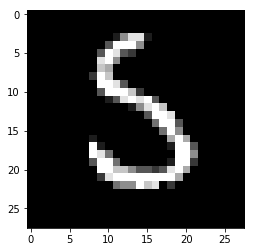

In [48]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

In [0]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [0]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier(max_depth=100, n_estimators=200)
rf_clf.fit(X_train_augmented, y_train_augmented)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn_clf = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [56]:
print("Random Forest:", accuracy_score(rf_clf.predict(X_test), y_test))
print("KNN:", accuracy_score(rfa_clf.predict(X_test), y_test))

Random Forest: 0.9778571428571429
KNN: 0.9971428571428571


In [0]:
test = pd.read_csv('test.csv')

In [58]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = test.values

In [60]:
X.shape

(28000, 784)

In [0]:
answer = pd.DataFrame({'ImageId': np.arange(X.shape[0]), 'Label': knn_clf.predict(X)})

In [0]:
answer['ImageId'] = np.arange(1, X.shape[0] + 1)

In [0]:
answer.to_csv('submission.csv', index=False)

In [65]:
answer.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
